## Genomgång av datan inför projektarbetet

In [34]:
# A ) 
#Hur många länder finns med? 

import pandas as pd

df = pd.read_csv("../../Project_Olympic/athlete_events.csv")
country = len(df["NOC"].unique())
print(F"Det finns {country} olikaländer.") #Det finns 230 olikaländer. (country)



Det finns 230 olikaländer.


In [35]:
# B ) Vilka länder finns med?

df["NOC"].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [36]:
# C ) Vilka sporter finns med?

different_sports = df["Sport"].unique()
different_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [37]:
# D ) Vilka medaljer finns med?

medals = df["Medal"].dropna().unique()
medals.tolist()



['Gold', 'Bronze', 'Silver']

In [38]:
# E ) Ta reda på statistik för: Ålder, medelvärde, min, max, standardavvikelse, antal personer.

df["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [39]:
# F ) Utforska datan vidare med egna frågor

den = (df["NOC"] == "DEN") & (df["Medal"] == "Silver")
den = den.sum()
print(f"Danmark har vunnit silver {den}ggr")


Danmark har vunnit silver 241ggr


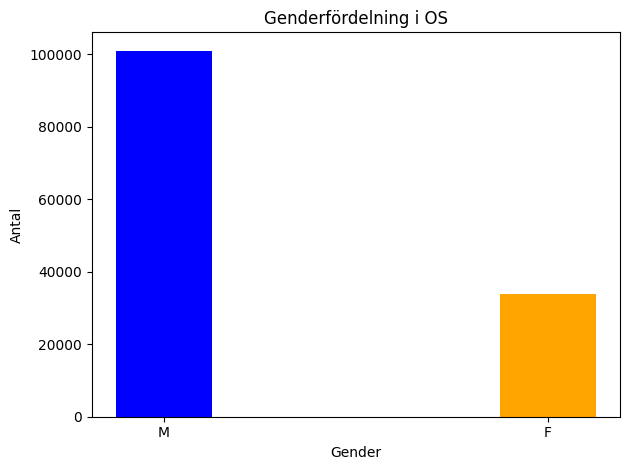

In [40]:
# G ) Diagram över könsfördelningen
import matplotlib.pyplot as plt

gender = df[["Name", "Sex"]].drop_duplicates()
gender = gender["Sex"].value_counts()

color = ["blue", "orange"]

plt.bar(gender.index, gender.values, color=color, width=0.25)
plt.title("Genderfördelning i OS")
plt.xlabel("Gender")
plt.ylabel("Antal")
plt.xticks()

plt.tight_layout()
plt.show()


<Axes: xlabel='count', ylabel='Team'>

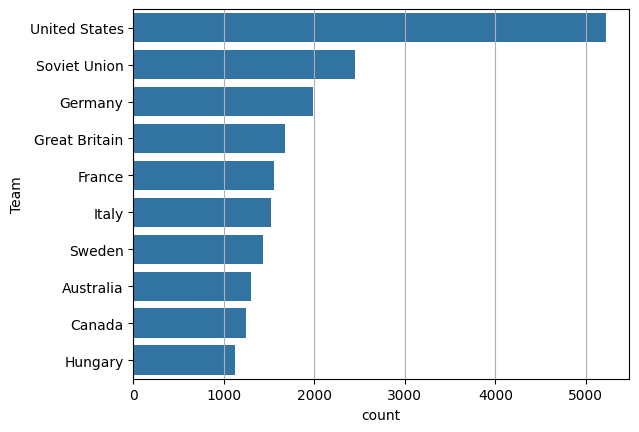

In [41]:
# H ) Gör ett diagram över topp 10 länder som tagit flest medaljer
import seaborn as sns
top10 = df[["Team", "Medal"]].dropna()
top10 = top10["Team"].value_counts().nlargest(10)

plt.grid(True)
sns.barplot(top10, orient="h")

In [42]:
import plotly.express as px

gender_per_year = pd.pivot_table(df, index="Year", columns="Sex", aggfunc="size", fill_value=0)
px.bar(gender_per_year)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Sex=F<br>Year=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
                          1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994,
                          1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]),
              'xaxis': 'x',
              'y': array([   0,   33,   16,   11,   47,   87,  134,  261,  437,  369,  549,  761,
                          1682, 1139, 1730, 1752, 2193, 2608, 2606, 2186, 2983, 4223, 5178, 1105,
                          5008, 1384, 5431, 1582, 5546, 1757, 5816, 1847, 5815, 2023, 6223]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Sex=M<br>Year=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'M',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'M',
              'offsetgroup': 'M',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
                          1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994,
                          1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]),
              'xaxis': 'x',
              'y': array([  380,  1903,  1285,  1722,  3054,  3953,  4158,  5432,  5137,  2952,
                           6852,  6719,  7676,  5295,  7505,  7728,  8286,  9351,  7896,  6751,
                           8605, 10453, 11235,  2055,  8772,  2221,  8390,  2527,  7897,  2625,
                           7786,  2555,  7105,  2868,  7465]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sex'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})